# STM R

Dans ce deuxieme lab, nous allons reprendre le corpus de l'est republicain mais avec le package STM en R.

Meme dataset que pour le lab 01

Pourquoi le package STM en R?

http://www.structuraltopicmodel.com/

* Facile à utiliser
* Beaucoup de fonctionnalités: preparation du corpus, visualization, ...
* Nombre de topics suggérés et analysable


# Le code R :

1. Chargement du dataset dans une dataframe
2. Nettoyage du code
3. Filtrage des mots en fonction de leur fréquence
4. STM / LDA
5. Résultats
6. Bonheur / Bliss 



In [29]:
# set working directory
setwd("~/amcp/upem/UPEM-NUMI/lab02/notebooks/")

# Chargement des packages
source('initialize.R')

# initialisation des parametres de l'experience
source('config.R')



[06:20:47] Config loaded: 
	experiment: 01
	on source: estrepublicain_annee_1999.csv 


In [27]:
# ------------------------------------------------------------------------------
#  Load data
# ------------------------------------------------------------------------------
qqcat("Load data from @{s.input_file}")

# Chargement du corpus dans une dataframe
df <- read.csv(s.input_file, nrows = 3348, col.names = c(s.text_feature))

# combien de rows
qqcat("dimensions:")
dim(df)

# Vérifier le contenu
#qqcat(" 2 premiers paragraphes")
#df$text[0:2]


processed <- textProcessor(df[,s.text_feature],
                           language         = "fr",
                           lowercase        = TRUE,
                           removestopwords  = TRUE,
                           customstopwords  = c('des'),
                           removenumbers    = TRUE,
                           removepunctuation = TRUE,
                           wordLengths      = c(s.min_wordlen,Inf),
                           striphtml        = TRUE,
                           stem             = FALSE,
                           verbose          = TRUE,
                           metadata         = df)
print(processed)


[06:19:36] Load data from /Users/alexis/amcp/upem/UPEM-NUMI/lab02/data/estrepublicain_annee_1999.csv
[06:19:37] dimensions:

[1] 3348    1

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Remove Custom Stopwords...
Removing numbers... 
Creating Output... 


ERROR: Error in simple_triplet_matrix(i, j, v, nrow = length(terms), ncol = length(corpus), : 'i, j' invalid


# Pre processing


Le package stm fait tout!


```processed``` contient

* ```processed$documents``` la matrice mots -documents
* ```processed$vocab``` la liste des mots


### Parametres

* lowercase
* removestopwords: utilise le snowball stemmer (meme que NLTK) cf: http://snowball.tartarus.org/algorithms/french/stop.txt
* ajouter des mots avec customstopwords
* stem: stemming transforme le mot en sa racine != lematization



In [13]:
# ------------------------------------------------------------------------------
# 1) pre process the text with basic NLP massaging
# ------------------------------------------------------------------------------
qqcat("pre processing\n")
processed <- textProcessor(df[,s.text_feature],
                           language         = "fr",
                           lowercase        = TRUE,
                           removestopwords  = TRUE,
                           customstopwords  = c('des'),
                           removenumbers    = TRUE,
                           removepunctuation = TRUE,
                           wordLengths      = c(s.min_wordlen,Inf),
                           striphtml        = TRUE,
                           stem             = FALSE,
                           verbose          = FALSE,
                           metadata         = df)
print(processed)





[06:15:16] pre processing


ERROR: Error in simple_triplet_matrix(i, j, v, nrow = length(terms), ncol = length(corpus), : 'i, j' invalid


## Reduire le corpus

Exclure les mots trop frequents ou pas assez avec ```lower.thresh``` et ```upper.thresh```



In [5]:
out   <- prepDocuments(processed$documents,
                       processed$vocab,
                       processed$meta,
                       lower.thresh = s.thresh.lower,
                       upper.thresh = s.thresh.upper
                   )

docs  <- out$documents
vocab <- out$vocab
meta  <- out$meta


Removing 118463 of 123532 terms (282553 of 798531 tokens) due to frequency 
Removing 1 Documents with No Words 
Your corpus now has 9999 documents, 5069 terms and 515978 tokens.

# Le topic model

On peut specifier un nombre de topic comme avec Gensim

Mais aussi laisser le modele trouver le nombre de topic optimal en donnant la valeur 0




In [6]:
qqcat("fit stm\n")

num_topics <- 0
fit <- stm(out$documents, out$vocab, 
           num_topics,
           reportevery = 10,
           max.em.its  = 100,
           emtol       = 1.5e-4,
           init.type   = "Spectral",
           seed        = 1
       )

# Sauver l'environnement
qqcat("stm done\n")
if (s.save_envt){
  qqcat("saving to @{s.envt_filename}")
  save.image(s.envt_filename)
}



[05:56:15] fit stm
Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	
	 Recovering initialization...
 	..................................................
Initialization complete.
.....................................................................................................
Completed E-Step (20 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -6.949) 
.....................................................................................................
Completed E-Step (17 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.815, relative change = 1.928e-02) 
.....................................................................................................
Completed E-Step (16 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -6.769, relative change = 6.718e-03) 
...................................................................................

# Explorer les resultats

* plot(fit, labeltype=c("frex"), main = 'Topic Most Frequent Words',bty="n")



In [ ]:
fit

In [9]:
plotModels(fit, main='Model Selection - Best Likelihood')

ERROR: Error in plotModels(fit, main = "Model Selection - Best Likelihood"): plotModels only works for selectModel objects


Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 70: histoire, film, l'éclipse, spectacle, pièce, scène,, frères, lunettes, faute, sœurs' in 'mbcsToSbcs': dot substituted for <c5>”Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 70: histoire, film, l'éclipse, spectacle, pièce, scène,, frères, lunettes, faute, sœurs' in 'mbcsToSbcs': dot substituted for <93>”Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 57: siècle, fleurs, exposition, l'art, jardin, l'exposition, œuvres, musée, photos, plantes' in 'mbcsToSbcs': dot substituted for <c5>”Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 57: siècle, fleurs, exposition, l'art, jardin, l'exposition, œuvres, musée, photos, plantes' in 'mbcsToSbcs': dot substituted for <93>”

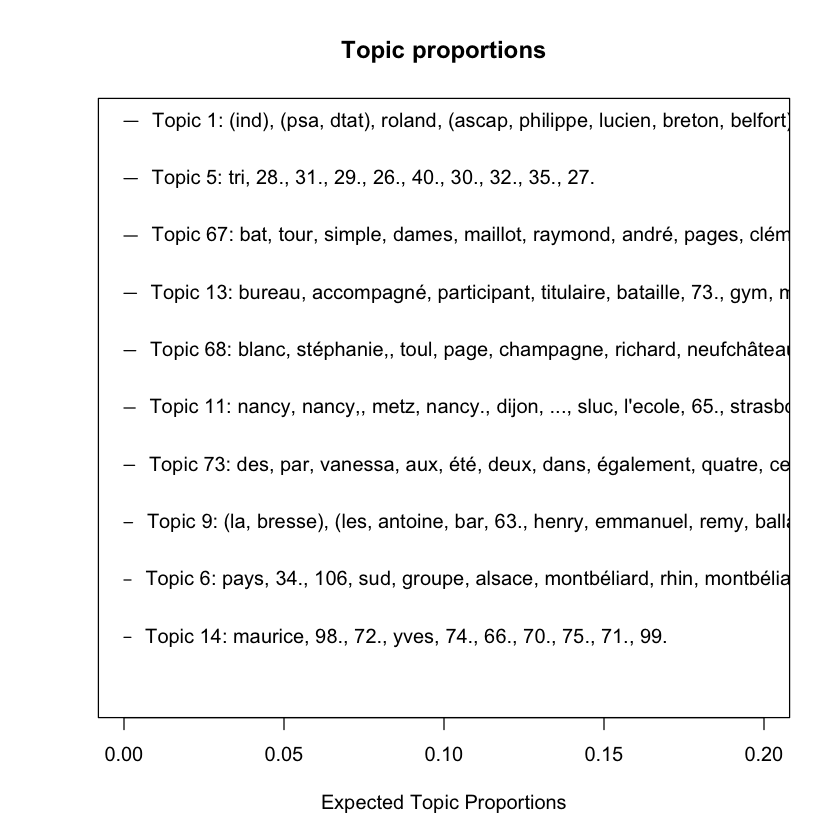

In [12]:
plot.STM(fit,type = "summary", labeltype= 'frex', main= 'Topic proportions', n = 10, xlim =c(0, 0.2), ylim=c(0,10))

In [11]:
?plot.STM